# FISH integrated analyses

<img src= /home/luisub/Desktop/FISH_Processing/docs/code_architecture.png alt="drawing" width="1000"/>

<img src= /Users/luisaguilera/Desktop/FISH_Processing/docs/code_architecture.png alt="drawing" width="1000"/>

## Libraries

In [1]:
# Importing libraries
import sys
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pathlib
import warnings
import shutil
import os
warnings.filterwarnings("ignore")

## Directories Path

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

# Connecting to NAS and Downloading data.

In [3]:
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
# Connection to nasstore2
#path_to_config_file = desktop_path.joinpath('config_2.yml')
#share_name = 'projects'
#remote_folder_path = pathlib.Path('qpbio','GAPDH_Exon_Cy5')

# Connection to munsky-nas
path_to_config_file = desktop_path.joinpath('config.yml')
share_name = 'share'
remote_folder_path = pathlib.Path('Test','test_dir')

# Download data from NAS
remote_folder_path = remote_folder_path
local_folder_path = pathlib.Path().absolute().joinpath('temp_' + remote_folder_path.name)
fa.NASConnection(path_to_config_file,share_name = share_name).copy_files(remote_folder_path, local_folder_path,timeout=60)

Connection established
File Downloaded : ROI003_XY1620755767_Z00_T0_merged.tif
File Downloaded : ROI007_XY1620756279_Z00_T0_merged.tif
Files downloaded to: /home/luisub/Desktop/FISH_Processing/notebooks/temp_test_dir


# Deffining parameters for the image processing

In [4]:
#data_dir = current_dir.parents[0].joinpath('dataBases').joinpath('ms2_cy5_20210518')
data_dir = local_folder_path     # path to a folder with images.

channels_with_cytosol = [1,2]            # list or int indicating the channels where the cytosol is detectable
channels_with_nucleus = 0                # list or int indicating the channels where the nucleus is detectable
channels_with_FISH = [1]               # list or int with the channels with FISH spots that are used for the quantification
diamter_nucleus = 200                    # approximate nucleus size in pixels
diameter_cytosol = 250 #250              # approximate cytosol size in pixels
# Parameters for FISH detection
voxel_size_z = 500                       # Microscope conversion px to nanometers in the z axis.
voxel_size_yx = 103                      # Microscope conversion px to nanometers in the xy axis.
psf_z = 600      #350                    # Theoretical size of the PSF emitted by a [rna] spot in the z plan, in nanometers.
psf_yx = 150     #150                    # Theoretical size of the PSF emitted by a [rna] spot in the yx plan, in nanometers.
# Cluster Detection
minimum_spots_cluster = 7                # The number of spots in a neighborhood for a point to be considered as a core point (from which a cluster is expanded). This includes the point itself.
show_plots=True                          # Flag to display plots

# Running the pipeline

 ____  ____   ___   ____ _____ ____ ____ ___ _   _  ____ 
|  _ \|  _ \ / _ \ / ___| ____/ ___/ ___|_ _| \ | |/ ___|
| |_) | |_) | | | | |   |  _| \___ \___ \| ||  \| | |  _ 
|  __/|  _ <| |_| | |___| |___ ___) |__) | || |\  | |_| |
|_|   |_| \_\\___/ \____|_____|____/____/___|_| \_|\____|
                                                         
 ___ __  __    _    ____ _____        ___  
|_ _|  \/  |  / \  / ___| ____|  _   / _ \ 
 | || |\/| | / _ \| |  _|  _|   (_) | | | |
 | || |  | |/ ___ \ |_| | |___   _  | |_| |
|___|_|  |_/_/   \_\____|_____| (_)  \___/ 
                                           

ORIGINAL IMAGE


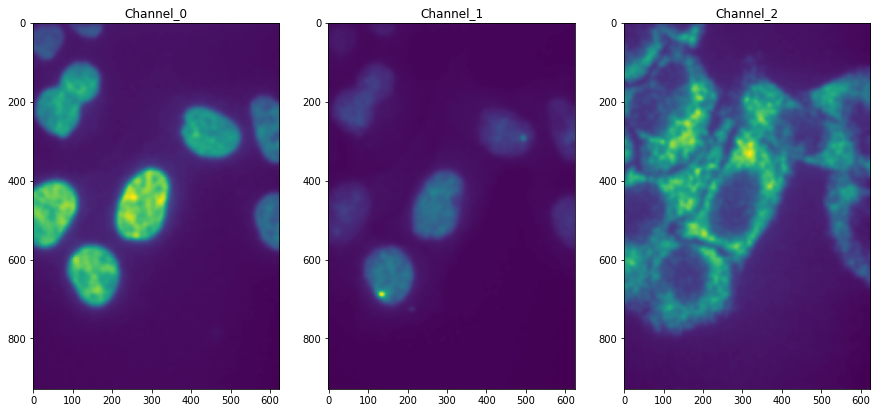

CELL SEGMENTATION
** TORCH CUDA version installed and working. **
>>>> using GPU


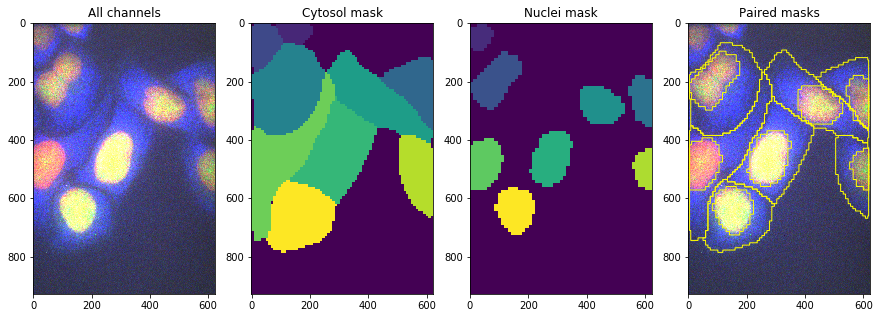

SPOT DETECTION
Spot Detection for Channel : 1


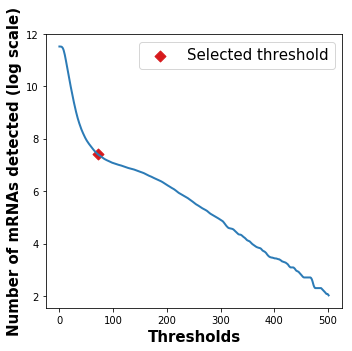

Z-Slice:  0


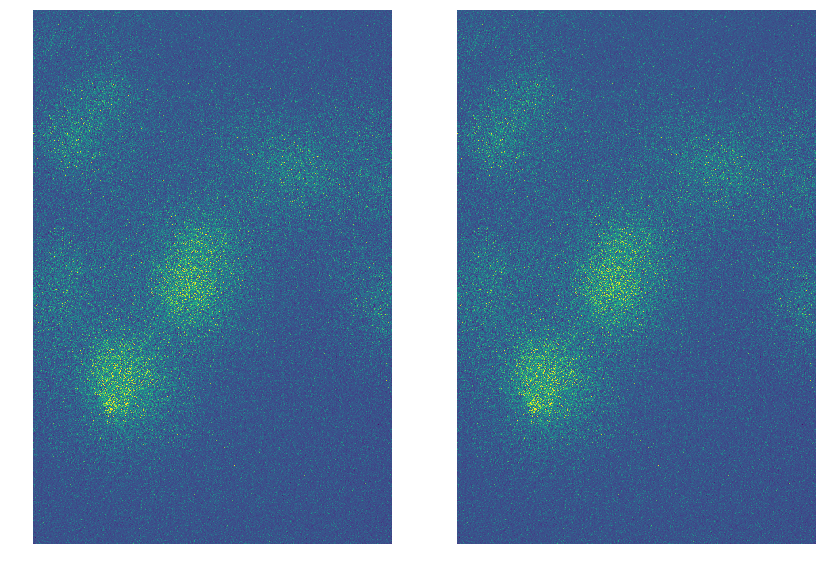

Z-Slice:  1


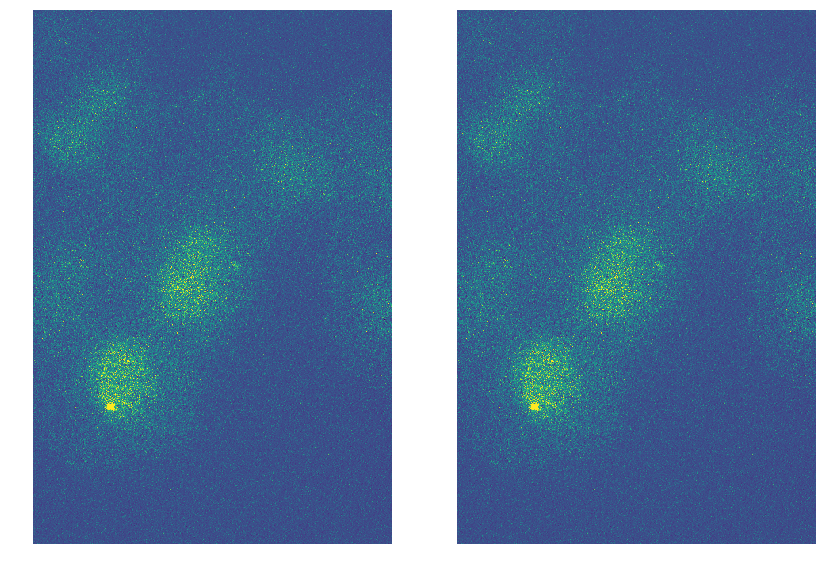

Z-Slice:  2


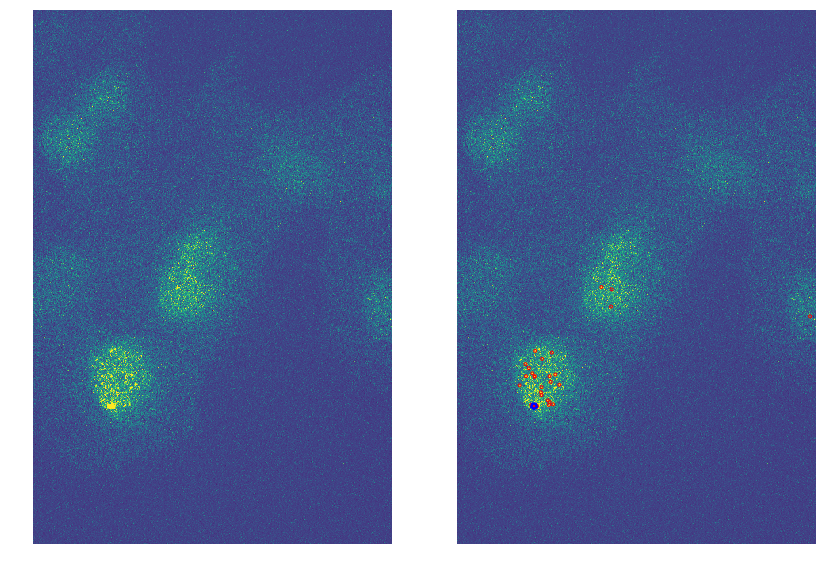

Z-Slice:  3


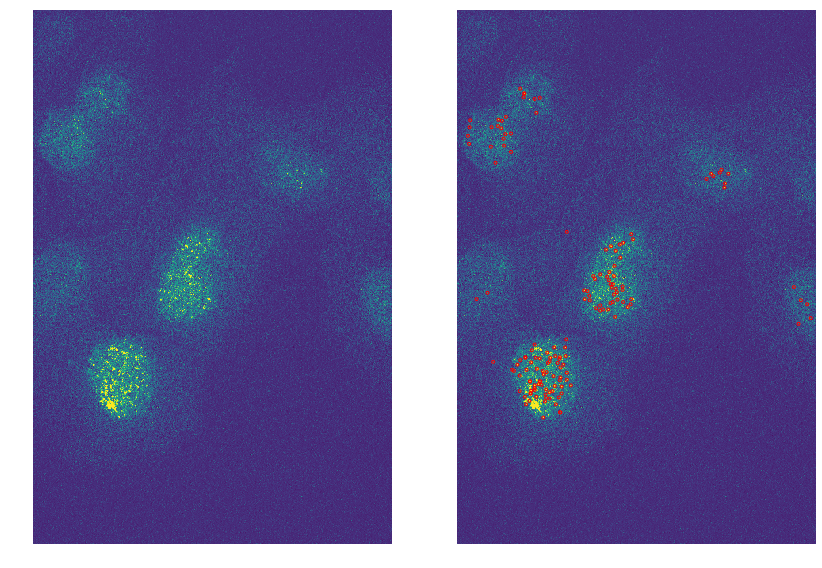

 ____  ____   ___   ____ _____ ____ ____ ___ _   _  ____ 
|  _ \|  _ \ / _ \ / ___| ____/ ___/ ___|_ _| \ | |/ ___|
| |_) | |_) | | | | |   |  _| \___ \___ \| ||  \| | |  _ 
|  __/|  _ <| |_| | |___| |___ ___) |__) | || |\  | |_| |
|_|   |_| \_\\___/ \____|_____|____/____/___|_| \_|\____|
                                                         
 ___ __  __    _    ____ _____       _ 
|_ _|  \/  |  / \  / ___| ____|  _  / |
 | || |\/| | / _ \| |  _|  _|   (_) | |
 | || |  | |/ ___ \ |_| | |___   _  | |
|___|_|  |_/_/   \_\____|_____| (_) |_|
                                       

ORIGINAL IMAGE


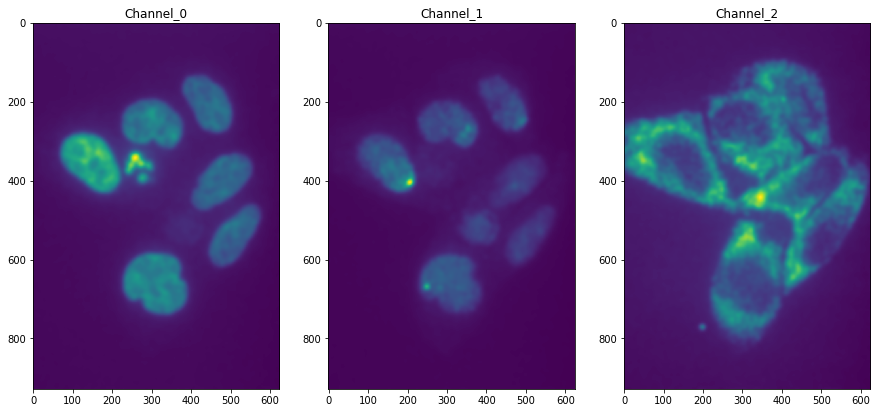

CELL SEGMENTATION
** TORCH CUDA version installed and working. **
>>>> using GPU


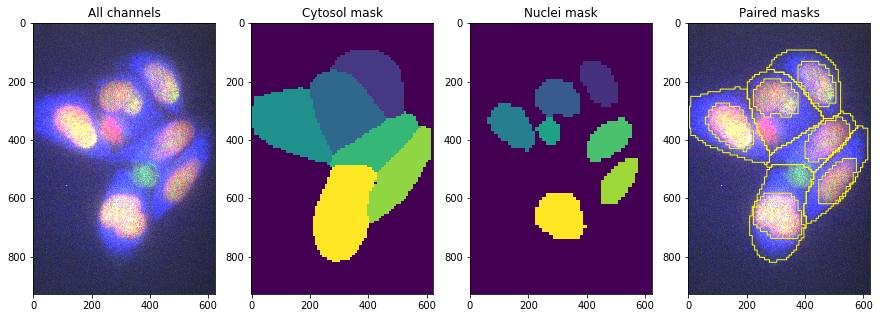

SPOT DETECTION
Spot Detection for Channel : 1


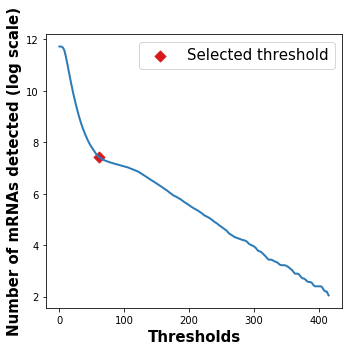

Z-Slice:  0


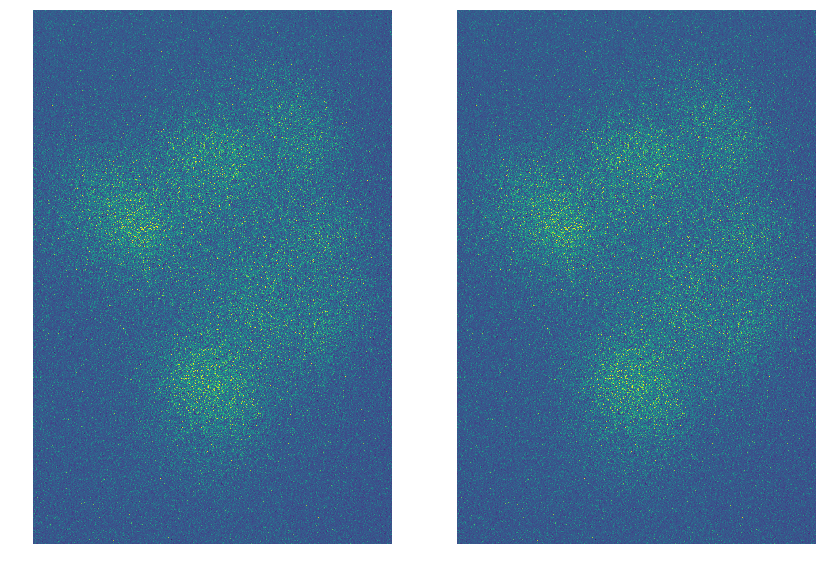

Z-Slice:  1


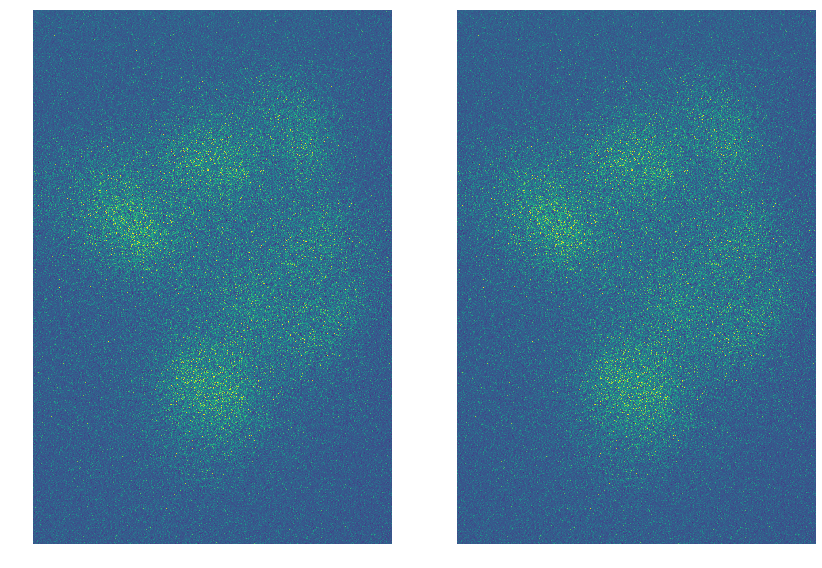

Z-Slice:  2


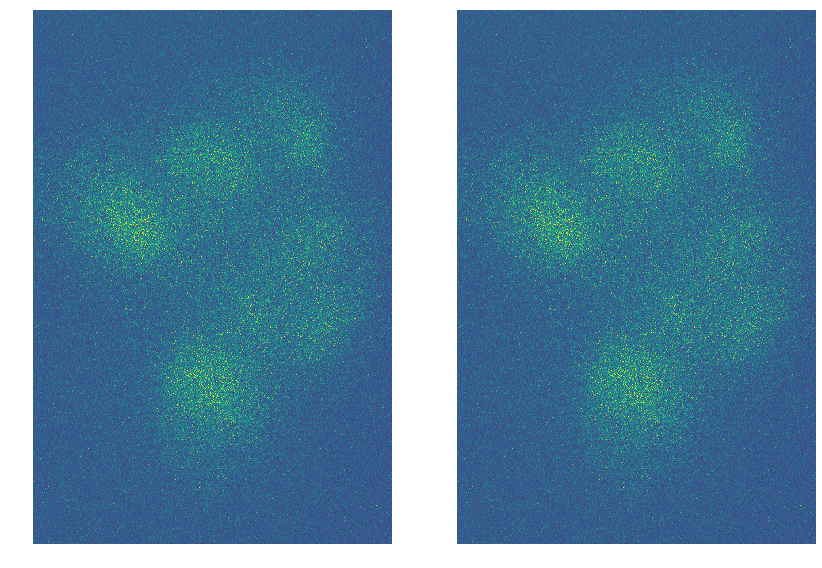

Z-Slice:  3


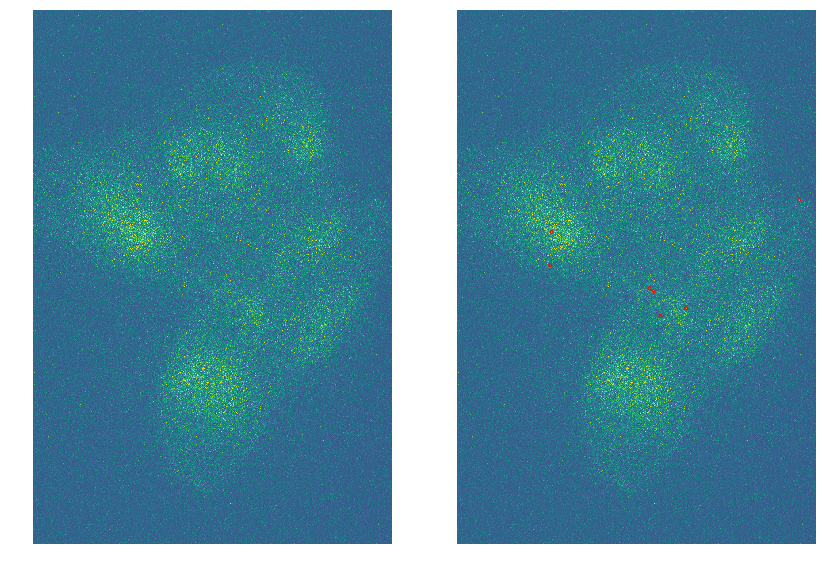

In [5]:
dataframe_FISH = fa.PipelineFISH(data_dir, channels_with_cytosol, channels_with_nucleus, channels_with_FISH,diamter_nucleus, diameter_cytosol, voxel_size_z, voxel_size_yx, psf_z, psf_yx, minimum_spots_cluster,show_plot=show_plots).run()

# Extracting data from the dataframe

In [6]:
dataframe_FISH.tail()

image_id  cell_id  spot_id  nucleus_y  nucleus_x  nuc_area_px  \
4456         1       12      586        660        310        21723   
4457         1       12      587        660        310        21723   
4458         1       12      588        660        310        21723   
4459         1       12      589        660        310        21723   
4460         1       12      590        660        310        21723   

      cyto_area_px  cell_area_px   z    y    x  is_nuc  is_cluster  \
4456         31409         53128   9  546  416       0           0   
4457         31409         53128  12  506  418       0           0   
4458         31409         53128  12  511  374       0           0   
4459         31409         53128  11  524  428       0           0   
4460         31409         53128  13  513  400       0           0   

      cluster_size  spot_type  is_cell_fragmented  
4456             0          0                   0  
4457             0          0                   0  
4458             0          0                   0  
4459             0          0                   0  
4460             0          0                   0

In [7]:
# Number of cells
spot_type_selected = 0
number_cells = dataframe_FISH['cell_id'].nunique()
print(number_cells)
# Number of spots
number_of_spots_per_cell = [len( dataframe_FISH.loc[  (dataframe_FISH['cell_id']==i) &  (dataframe_FISH['is_cluster']==False) & (dataframe_FISH['is_nuc']==True) & (dataframe_FISH['spot_type']==spot_type_selected) ].spot_id) for i in range(0, number_cells)]
# Number of TS per cell
number_of_TS_per_cell = [len( dataframe_FISH.loc[  (dataframe_FISH['cell_id']==i) &  (dataframe_FISH['is_cluster']==True) & (dataframe_FISH['is_nuc']==True) & (dataframe_FISH['spot_type']==spot_type_selected) ].spot_id) for i in range(0, number_cells)]
# Number of RNA in a TS
ts_size =  dataframe_FISH.loc[   (dataframe_FISH['is_cluster']==True) & (dataframe_FISH['is_nuc']==True)  & (dataframe_FISH['spot_type']==spot_type_selected)   ].cluster_size.values
# Size of each cell
cell_size = dataframe_FISH.loc[  (dataframe_FISH['spot_id']==0)  ].cell_area_px.values

13


# Plotting

<Figure size 432x288 with 0 Axes>

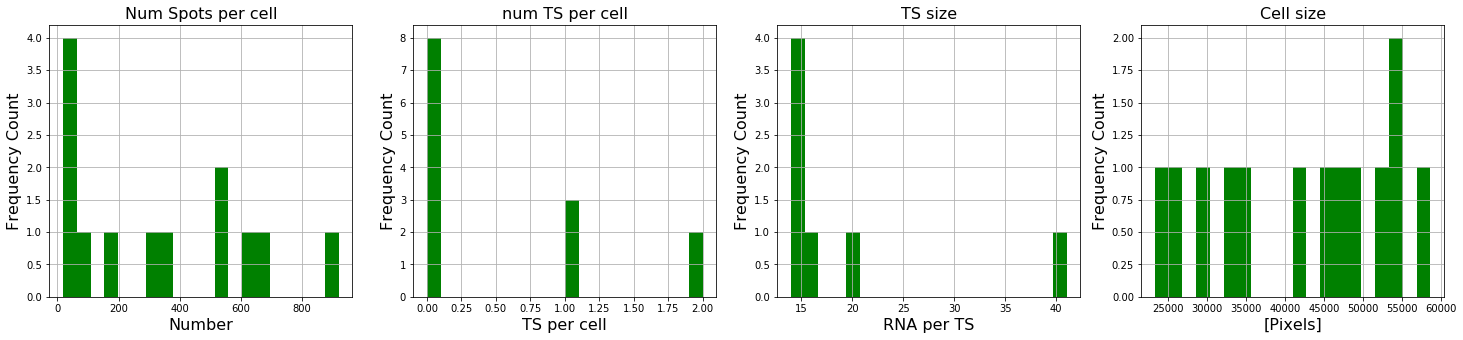

In [8]:
def plot_probability_distribution(data_to_plot, numBins = 10, title='', xlab='', ylab='', color='r', subplots=False, show_grid=True, fig=plt.figure() ):
  plt.hist(data_to_plot,bins=numBins,density=False,color=color)
  plt.xlabel(xlab, size=16)
  plt.ylabel(ylab, size=16)
  plt.grid(show_grid)
  plt.title(title, size=16)
  return (f)
#Plotting
fig_size = (25, 5)
f = plt.figure(figsize=fig_size)
#ylab='Probability'
ylab='Frequency Count'  
# adding subplots
f.add_subplot(1,4,1) 
plot_probability_distribution( number_of_spots_per_cell, numBins=20,  title='Num Spots per cell', xlab='Number', ylab=ylab, fig=f, color='g')
f.add_subplot(1,4,2) 
plot_probability_distribution(number_of_TS_per_cell,   numBins=20,  title='num TS per cell', xlab='TS per cell', ylab=ylab, fig=f, color='g')
f.add_subplot(1,4,3) 
plot_probability_distribution(ts_size, numBins=20,    title='TS size', xlab='RNA per TS', ylab=ylab, fig=f, color='g')
f.add_subplot(1,4,4) 
plot_probability_distribution(cell_size ,  numBins=20, title='Cell size', xlab='[Pixels]', ylab=ylab, fig=f, color='g')
# plt.savefig('./results/sim_intensity_dist_ch0.png')
plt.show()

# Sending results to NAS.

In [9]:
# Writing data to NAS
remote_folder_path = remote_folder_path

local_file_to_send_to_NAS = pathlib.Path().absolute().joinpath('metadata_'+ remote_folder_path.name +'.txt')
fa.NASConnection(path_to_config_file,share_name = share_name).write_files_to_NAS(local_file_to_send_to_NAS, remote_folder_path)

local_file_to_send_to_NAS = pathlib.Path().absolute().joinpath('dataframe_' + remote_folder_path.name +'.csv')
fa.NASConnection(path_to_config_file,share_name = share_name).write_files_to_NAS(local_file_to_send_to_NAS, remote_folder_path)


Connection established
Connection established


# Removing temporal local files

In [10]:
# delete local files
#shutil.rmtree(local_folder_path)
#os.remove('metadata_'+ remote_folder_path.name +'.txt')
#os.remove('dataframe_' + remote_folder_path.name +'.csv')
